In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from importlib import reload

# DBSCAN import
from sklearn.cluster import DBSCAN
# Scaler import
from sklearn.preprocessing import MinMaxScaler

# import modules
import src.wrangle as wr

# define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [3]:
df = wr.get_logs()

In [4]:
df.head()

,date_time,date,page,id,cohort,ip,cohort_name,topic,lesson,Topic,Lesson,full_lesson_name,field
0,2018-01-26 09:55:03,2018-01-26,index,1,8,97.105.19.61,Hampton,index,index,index,index,index,WebDev
1,2018-01-26 09:56:02,2018-01-26,java-ii,1,8,97.105.19.61,Hampton,java-ii,java-ii,java-ii,java-ii,java-ii,WebDev
2,2018-01-26 09:56:05,2018-01-26,java-ii/object-oriented-programming,1,8,97.105.19.61,Hampton,java-ii,object-oriented-programming,java-ii,object-oriented-programming,java-ii object-oriented-programming,WebDev
3,2018-01-26 09:56:06,2018-01-26,slides/object_oriented_programming,1,8,97.105.19.61,Hampton,slides,object_oriented_programming,slides,object_oriented_programming,slides object_oriented_programming,WebDev
4,2018-01-26 09:56:24,2018-01-26,javascript-i/conditionals,2,22,97.105.19.61,Teddy,javascript-i,conditionals,javascript-i,conditionals,javascript-i conditionals,WebDev


##### 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [12]:
def get_top_lessons(df: pd.DataFrame, name:str='total', i:int=5, viz:bool=False):
    '''
    Finds i most popular lessons in a dataframe
    
    Parameters:
        df: logs dataframe
        name: name of the dataframe
        i: number of rows to return
    Returns:
        data frame
    '''
    # series with groupby results
    s = df.groupby('full_lesson_name').page.count().sort_values(ascending=False).head(i)
    if viz:
        popular = s.reset_index()
        popular['field'] = name
    else:
        popular= s.reset_index().rename({'lesson':name, 'page':name+'_page'}, axis=1)
    return popular

In [6]:
get_top_lessons(df)

,total,total_page
0,index,50316
1,introduction,39116
2,fundamentals,36298
3,css-i,32884
4,search_index.json,21429


In [24]:
ds = df[df.field == 'DS']
wd = df[df.field == 'WebDev']

In [25]:
df.field.unique()

['WebDev', 'No Name', 'Staff', 'DS']
Categories (4, object): ['DS', 'No Name', 'Staff', 'WebDev']

In [26]:
popular_lessons = \
    pd.concat([get_top_lessons(df, 'total', 5), get_top_lessons(ds, 'DS', 5), get_top_lessons(wd, 'WD', 5)], axis=1)

In [27]:
popular_lessons

,full_lesson_name,total_page,full_lesson_name,DS_page,full_lesson_name,WD_page
0,index,50315,index,8359,index,31157
1,spring fundamentals,36271,search search_index.json,2203,spring fundamentals,30931
2,html-css css-i,32875,classification overview,1785,html-css css-i,29391
3,javascript-i introduction,25163,1-fundamentals modern-data-scientist.jpg,1655,javascript-i introduction,23232
4,html-css css-ii,21002,1-fundamentals AI-ML-DL-timeline.jpg,1651,html-css css-ii,19291


In [28]:
popular_lessons2 = pd.concat([get_top_lessons(df, 'total', 5, viz=True), \
                              get_top_lessons(ds, 'DS', 5, viz=True),\
                              get_top_lessons(wd, 'WD', 5, viz=True)],\
                              axis=0, ignore_index=True)

In [29]:
popular_lessons2

,full_lesson_name,page,field
0,index,50315,total
1,spring fundamentals,36271,total
2,html-css css-i,32875,total
3,javascript-i introduction,25163,total
4,html-css css-ii,21002,total
5,index,8359,DS
6,search search_index.json,2203,DS
7,classification overview,1785,DS
8,1-fundamentals modern-data-scientist.jpg,1655,DS
9,1-fundamentals AI-ML-DL-timeline.jpg,1651,DS


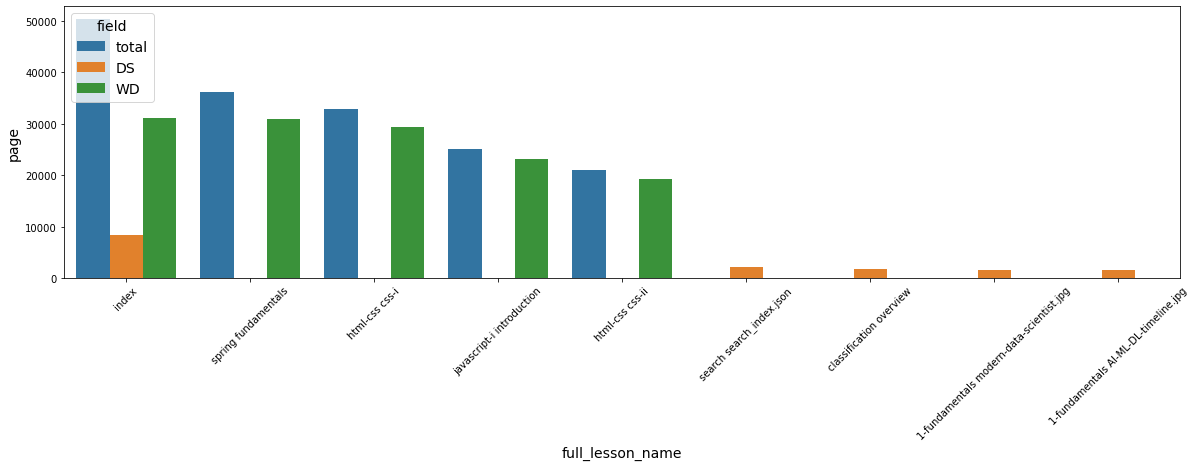

In [33]:
plt.figure(figsize=(20, 5))
ax = sns.barplot(data=popular_lessons2, x='full_lesson_name', y='page', hue='field')
plt.xticks(rotation=45)
plt.show()

##### 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

##### 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

##### 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

##### 7. Which lessons are least accessed?